**Rochel—** this runs 100 time steps of a two-dimensional turbulence simulation with 128² finite volume cells and a fifth-order upwinded WENO advection scheme (which is quite similar to the two-dimensional turbulence example). I don't know what any of this means yet, but let's learn together! ♡Shmuel

In [1]:
using Oceananigans

grid = RectilinearGrid(size = (128, 128),
                       x = (0, 2π),
                       y = (0, 2π),
                       topology = (Periodic, Periodic, Flat))

model = NonhydrostaticModel(; grid, advection=WENO())

ϵ(x, y) = 2rand() - 1
set!(model, u=ϵ, v=ϵ)

simulation = Simulation(model; Δt=0.01, stop_iteration=100)
run!(simulation)

[ Info: Initializing simulation...
[ Info:     ... simulation initialization complete (2.942 seconds)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (3.134 seconds).
[ Info: Simulation is stopping after running for 10.183 seconds.
[ Info: Model iteration 100 equals or exceeds stop iteration 100.


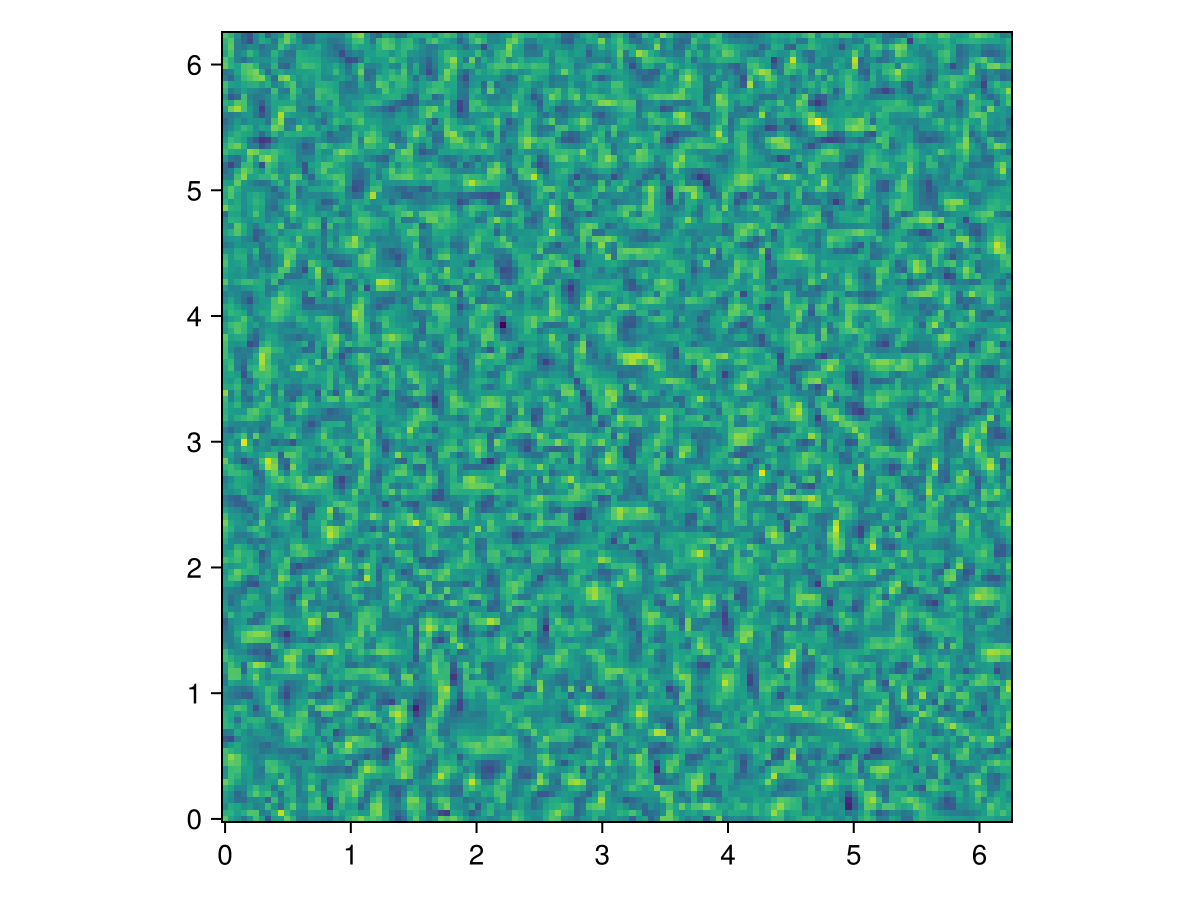

In [2]:
using CairoMakie

u, v, w = model.velocities
ζ = Field(∂x(v) - ∂y(u))
compute!(ζ)

heatmap(ζ, axis=(; aspect=1))

[ Info: Initializing simulation...
[ Info:     ... simulation initialization complete (10.060 ms)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (32.257 ms).
[ Info: Simulation is stopping after running for 13.097 seconds.
[ Info: Model iteration 500 equals or exceeds stop iteration 500.


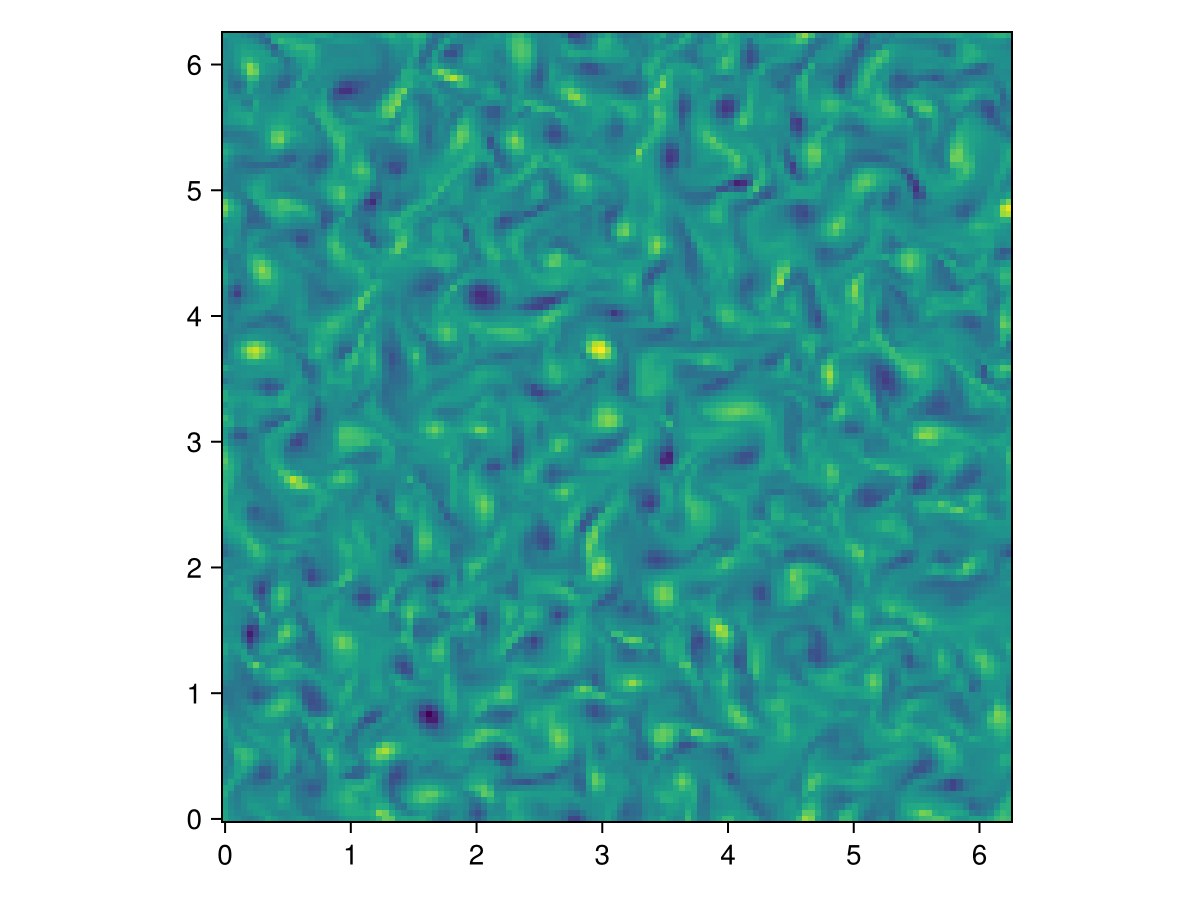

In [3]:
simulation.stop_iteration += 400
run!(simulation)

compute!(ζ)
heatmap(ζ, axis=(; aspect=1))

[ Info: Initializing simulation...
[ Info:     ... simulation initialization complete (7.492 seconds)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (7.535 seconds).
[ Info: Simulation is stopping after running for 3.506 hours.
[ Info: Simulation time 10 seconds equals or exceeds stop time 10 seconds.


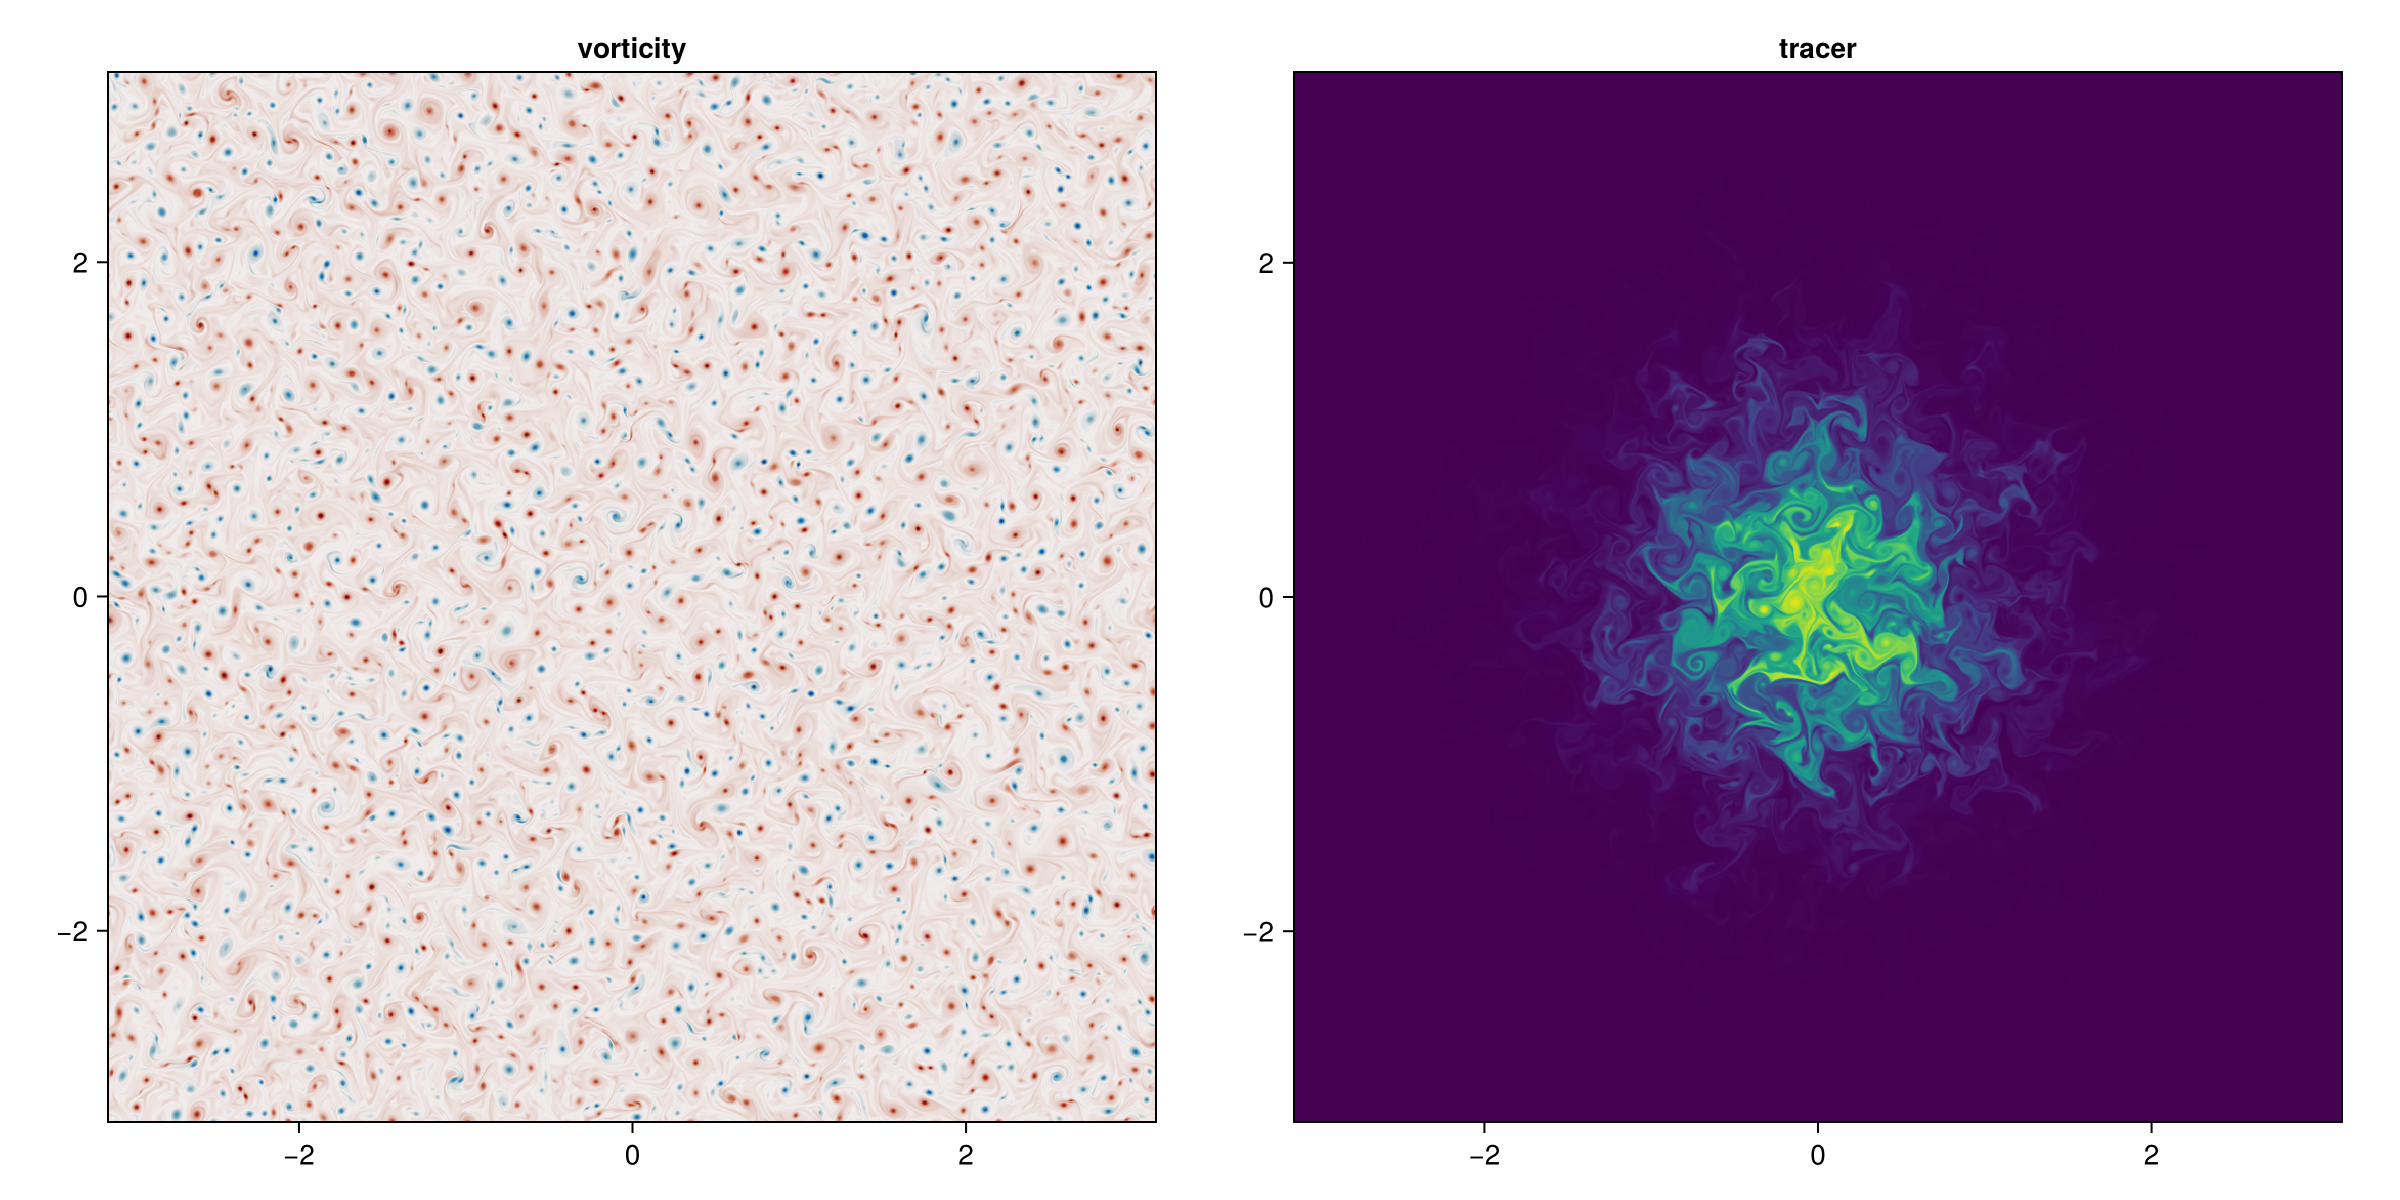

In [5]:
using Oceananigans
using CairoMakie

grid = RectilinearGrid(CPU(),
                       size = (1024, 1024),
                       x = (-π, π),
                       y = (-π, π),
                       topology = (Periodic, Periodic, Flat))

model = NonhydrostaticModel(; grid, advection=WENO(), tracers=:c)

δ = 0.5
cᵢ(x, y) = exp(-(x^2 + y^2) / 2δ^2)
ϵ(x, y) = 2rand() - 1
set!(model, u=ϵ, v=ϵ, c=cᵢ)

simulation = Simulation(model; Δt=1e-3, stop_time=10)
conjure_time_step_wizard!(simulation, cfl=0.2, IterationInterval(10))
run!(simulation)

u, v, w = model.velocities
ζ = Field(∂x(v) - ∂y(u))
compute!(ζ)

fig = Figure(size=(1200, 600))
axζ = Axis(fig[1, 1], aspect=1, title="vorticity")
axc = Axis(fig[1, 2], aspect=1, title="tracer")
heatmap!(axζ, ζ, colormap=:balance)
heatmap!(axc, model.tracers.c)
current_figure()

https://clima.github.io/OceananigansDocumentation/stable/quick_start/